In [1]:
%matplotlib inline
import model_fitting as mf

In [2]:
# Model
model = """
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
"""
parameters = mf.makeParameters(constants=['k1', 'k2'])

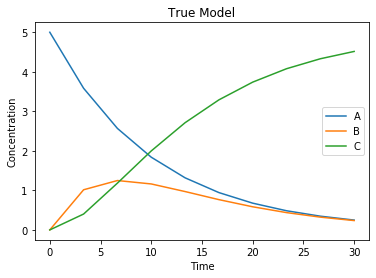

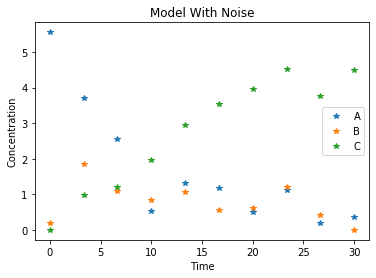

In [3]:
# Create synthetic observational data and plot it.
simulation_results = mf.runSimulation(model=model, num_points=10)
true_data = simulation_results.data
obs_data = mf.makeObservations(model=model, noise_std=0.5, num_points=10)
columns = ['A', 'B', 'C']
mf.plotTimeSeries(true_data, title="True Model", columns=columns)
mf.plotTimeSeries(obs_data, title="Model With Noise", is_scatter=True, columns=columns)

In [4]:
# Parameter fitting
# Illustration of parameter fitting
mf.fit(obs_data, model=model, parameters=parameters)

name,value,standard error,relative error,initial value,min,max,vary
k1,0.11001719,0.00888353,(8.07%),1,0.00000000,10.0000000,True
k2,0.19872058,0.02774937,(13.96%),1,0.00000000,10.0000000,True


In [5]:
# Cross validate to fit model
mf.crossValidate(obs_data, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.1008978614359469 +/- 0.00967, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.2022396437957556 +/- 0.0365, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.10906192057024242 +/- 0.00952, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.2105996232963593 +/- 0.0329, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.1228036267093671 +/- 0.0142, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.1824209491488007 +/- 0.0316, bounds=[0:10]>)])],
 [0.366745381066207, -0.4861832092476157, 0.24909402702225747])

## Exercise 1: Effect of Observational Data
1. Re-run the foregoing with nose_std=2.0. How do the fits change? How do the $R^2$ values change? Run the codes a few times to see the variations in the quality of fit and parameter estimates.
1. Do you get better fits if you increase the number of points?

In [6]:
# Create synthetic observational data and plot it.
num_points = 20
obs_data = mf.makeObservations(model=model, noise_std=2.0, num_points=num_points)
mf.crossValidate(obs_data, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.06921159154658749 +/- 0.0159, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.13856495939308922 +/- 0.0576, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.08198940306107966 +/- 0.0209, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.11420708229392217 +/- 0.0433, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.10427891517852257 +/- 0.0257, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.12852635530311335 +/- 0.0427, bounds=[0:10]>)])],
 [-18.331657374018683, -16.968224950750912, -22.805566125268395])

## Exercise 2: Analyze a different model

     A -> B; k1*A
     B -> C; k2*B
     A -> C; k3*C
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
     k3 = 0.3
     
 1. Create synthetic data for this model.
 1. How do the dynamics of the second model differ from the first?
 1. Do cross validation using this model and obtain $R^2$ values and parameter estimates for 2 folds? 3 folds?

In [7]:
# A model to analyzie
model2 = """
     A -> B; k1*A
     B -> C; k2*B
     A -> C; k3*C
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
     k3 = 0.05
"""
parameters2 = mf.makeParameters(constants=['k1', 'k2', 'k3'])

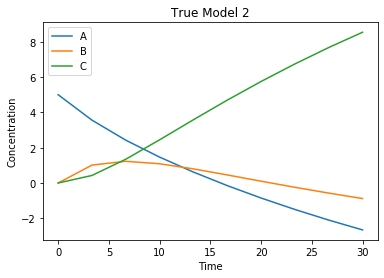

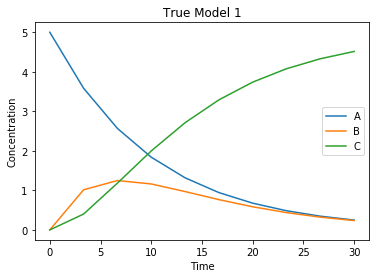

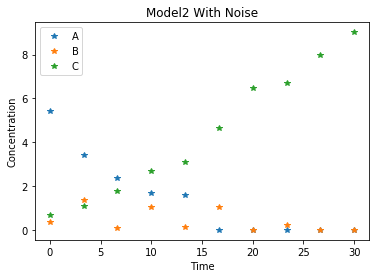

In [10]:
# Create synthetic observational data and plot it.
simulation_result = mf.runSimulation(model=model2, num_points=10)
true_data2 = simulation_result.data
obs_data2 = mf.makeObservations(model=model2, noise_std=0.5, num_points=10)
columns = ['A', 'B', 'C']
mf.plotTimeSeries(true_data2, title="True Model 2", columns=columns)
mf.plotTimeSeries(true_data, title="True Model 1", columns=columns)
mf.plotTimeSeries(obs_data2, title="Model2 With Noise", is_scatter=True, columns=columns)

In [11]:
# Illustration of parameter fitting
mf.fit(obs_data2, model=model2, parameters=parameters2)

name,value,standard error,relative error,initial value,min,max,vary
k1,0.34403605,0.04249271,(12.35%),1,0.00000000,10.0000000,True
k2,2.2293e-05,1.2212e-04,(547.81%),1,0.00000000,10.0000000,True
k3,0.36939608,0.27279221,(73.85%),1,0.00000000,10.0000000,True


In [12]:
# Cross validate to fit model
mf.crossValidate(obs_data2, model=model2, parameters=parameters2, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=4.031523418770155 +/- 8.33, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.1866723658448896 +/- 0.107, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.014812748542684493 +/- 0.0373, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=9.332073721456203 +/- 7.52e+04, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=4.296408803936458 +/- 6.31e+04, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=3.7740932715752447e-10 +/- 0.572, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.0979421865305638 +/- 0.015, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.25247246315164523 +/- 0.117, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.03952616208306541 +/- 0.00587, bounds=[0:10]>)])],
 [-1.5499530809277595, -8.

## Exercise 3: Fitting the Wrong Model
1. Create synthetic data using the second model.
1. Fit the first model to these data.
1. How do the $R^2$ values from cross validation compare with those when we use the correct model? How accurately are k1 and k2 estimated?
1. What happens to parameter estimates if k3 = 0.1?

In [13]:
# Create synthetic observational data and plot it.
num_points = 10
obs_data3 = mf.makeObservations(model=model2, noise_std=0.5, num_points=num_points)

In [14]:
# Illustration of parameter fitting
mf.fit(obs_data3, model=model, parameters=parameters)

name,value,standard error,relative error,initial value,min,max,vary
k1,0.15757352,0.04180688,(26.53%),1,0.00000000,10.0000000,True
k2,0.31193695,0.15519339,(49.75%),1,0.00000000,10.0000000,True


In [15]:
# Cross validate to fit model
mf.crossValidate(obs_data3, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.15101932494526196 +/- 0.0417, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.30558972431588144 +/- 0.164, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.17442562027375463 +/- 0.066, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.26796593512747935 +/- 0.148, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.1489524523351842 +/- 0.0509, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.39302715555792245 +/- 0.327, bounds=[0:10]>)])],
 [-1.407913834142395, -0.8427521095967669, -0.6209760113432101])